In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


#2.Load the dataset

In [2]:
dataset=pd.read_csv("/content/Churn_Modelling.csv")

#3.Perform Below Visualizations

#a)Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


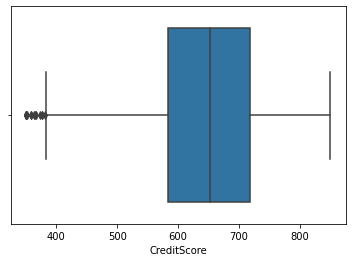

In [3]:
sns.boxplot(dataset['CreditScore'])

#b)Bi-Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


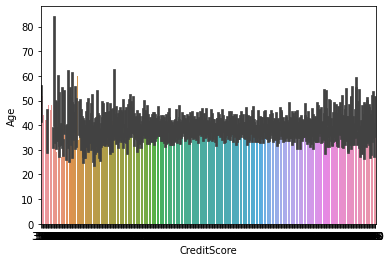

In [4]:
sns.barplot(dataset['CreditScore'],dataset['Age'])

#c)Multi-Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


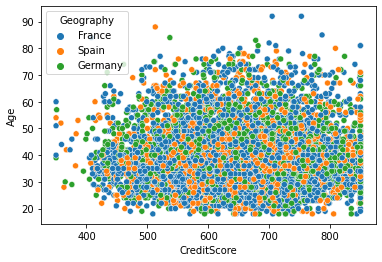

In [5]:
sns.scatterplot(dataset['CreditScore'],dataset['Age'],dataset['Geography'])

#4.Perform descriptive statistics on the dataset

In [6]:
dataset.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64

In [7]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#5.Handle the missing values

In [8]:
dataset.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [9]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#6.Find the outliers and replace the outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


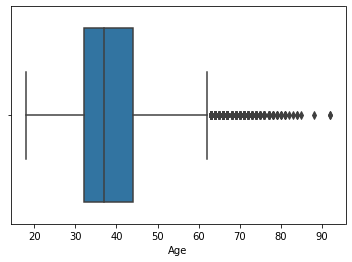

In [10]:
sns.boxplot(dataset['Age'])

In [11]:
q=dataset.quantile([0.75,0.25])
q

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.75,7500.25,15753233.75,718.0,44.0,7.0,127644.24,2.0,1.0,1.0,149388.2475,0.0
0.25,2500.75,15628528.25,584.0,32.0,3.0,0.00,1.0,0.0,0.0,51002.1100,0.0


In [12]:
iqr=q.iloc[0]-q.iloc[1]
iqr

RowNumber            4999.5000
CustomerId         124705.5000
CreditScore           134.0000
Age                    12.0000
Tenure                  4.0000
Balance            127644.2400
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     98386.1375
Exited                  0.0000
dtype: float64

In [13]:
u=q.iloc[0]+(1.5*iqr)
u

RowNumber          1.499950e+04
CustomerId         1.594029e+07
CreditScore        9.190000e+02
Age                6.200000e+01
Tenure             1.300000e+01
Balance            3.191106e+05
NumOfProducts      3.500000e+00
HasCrCard          2.500000e+00
IsActiveMember     2.500000e+00
EstimatedSalary    2.969675e+05
Exited             0.000000e+00
dtype: float64

In [14]:
l=q.iloc[1]-(1.5*iqr)
l

RowNumber         -4.998500e+03
CustomerId         1.544147e+07
CreditScore        3.830000e+02
Age                1.400000e+01
Tenure            -3.000000e+00
Balance           -1.914664e+05
NumOfProducts     -5.000000e-01
HasCrCard         -1.500000e+00
IsActiveMember    -1.500000e+00
EstimatedSalary   -9.657710e+04
Exited             0.000000e+00
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


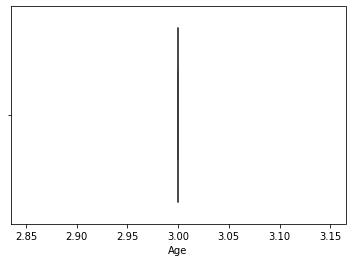

In [15]:
dataset['Age']=np.where(dataset['Age']>10,3,dataset['Age'])
sns.boxplot(dataset['Age'])

#7.Check for catregorical columns and perform encoding

In [17]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
ohe=OneHotEncoder()
dataset['Gender']=le.fit_transform(dataset['Gender'])
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,1,3,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,1,3,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,0,3,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,1,3,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,0,3,4,130142.79,1,1,0,38190.78,0


#8.Split the data into dependent and independent variables

In [18]:
x=dataset.iloc[:,6:9]
x

,Age,Tenure,Balance
0,3,2,0.00
1,3,1,83807.86
2,3,8,159660.80
3,3,1,0.00
4,3,2,125510.82
...,...,...,...
9995,3,5,0.00
9996,3,10,57369.61
9997,3,7,0.00
9998,3,3,75075.31


In [19]:
y=dataset['Balance']
y

0            0.00
1        83807.86
2       159660.80
3            0.00
4       125510.82
          ...    
9995         0.00
9996     57369.61
9997         0.00
9998     75075.31
9999    130142.79
Name: Balance, Length: 10000, dtype: float64

#9.Scale the independent variables

In [20]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
t=StandardScaler()
a_scale=t.fit_transform(x)
a_scale

array([[ 0.        , -1.04175968, -1.22584767],
       [ 0.        , -1.38753759,  0.11735002],
       [ 0.        ,  1.03290776,  1.33305335],
       ...,
       [ 0.        ,  0.68712986, -1.22584767],
       [ 0.        , -0.69598177, -0.02260751],
       [ 0.        , -0.35020386,  0.85996499]])

#10.Split the data into training and testing

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(a_scale,y,test_size=0.5,random_state=0)
x_train

array([[ 0.        ,  1.03290776,  0.56940985],
       [ 0.        , -0.00442596,  0.8076017 ],
       [ 0.        , -1.04175968, -1.22584767],
       ...,
       [ 0.        , -0.00442596,  1.35890908],
       [ 0.        ,  1.37868567, -1.22584767],
       [ 0.        , -1.38753759,  0.50630343]])

In [23]:
x_train.shape

(5000, 3)

In [24]:
x_test

array([[ 0.        ,  1.03290776,  0.87532296],
       [ 0.        , -1.04175968,  0.42442221],
       [ 0.        ,  1.03290776,  0.30292727],
       ...,
       [ 0.        , -0.69598177,  0.69241791],
       [ 0.        ,  1.37868567,  0.83018117],
       [ 0.        , -0.00442596, -1.22584767]])

In [25]:
x_test.shape

(5000, 3)

In [26]:
y_train

333     112013.81
6391    126875.62
4786         0.00
357     126436.29
9854    121231.39
          ...    
9225    120074.97
4859    114440.24
3264    161274.05
9845         0.00
2732    108076.33
Name: Balance, Length: 5000, dtype: float64

In [27]:
y_test

9394    131101.04
898     102967.41
2398     95386.82
5906    112079.58
2343    163034.82
          ...    
3996         0.00
5889     52192.08
4577    119688.81
8600    128284.45
847          0.00
Name: Balance, Length: 5000, dtype: float64